#/////////////////////////////////////////////////////////Global Sea Surface Temperature/////////////////////////////////////////////////

In [2]:
%%capture
!pip install cartopy
!pip install netCDF4

In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import seaborn as sns
from netCDF4 import Dataset
import cartopy.feature as cfeature

In [4]:
# Define the base URL and catalog URL for SST data
baseURL = 'http://www.esrl.noaa.gov'
catalogURL = '/psd/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc'

In [5]:
# Open the dataset using netCDF4
dataset_url = baseURL + catalogURL
nc = Dataset(dataset_url)

In [6]:
# Convert the netCDF4 dataset to an xarray dataset
sstID = xr.open_dataset(xr.backends.NetCDF4DataStore(nc))

# Access the sea surface temperature (sst) variable
sst = sstID['sst']

# Find the most recent time index
mostRecent = len(sst.time.values) - 1


In [9]:
# Select the most recent SST data
recentSST = sst.isel(time=mostRecent)

# Define contour levels
sstmin = 0
sstmax = 30
levels = np.linspace(sstmin, sstmax, 21)

In [ ]:
# Create a figure with Equal Earth projection centered on Asia
fig = plt.figure(figsize=[12, 6], facecolor='none')
ax = plt.subplot(1, 1, 1, projection=ccrs.EqualEarth(central_longitude=90), facecolor='none')

# Use seaborn's icefire colormap
cmap = sns.color_palette("icefire", as_cmap=True)

# Plot the SST data
contour = recentSST.plot.contourf(levels=levels, cmap=cmap, transform=ccrs.PlateCarree(), ax=ax, add_colorbar=False)

# Add coastlines with higher resolution
ax.coastlines('10m')

# Add country borders with black color
ax.add_feature(cfeature.BORDERS, edgecolor='black')

# Fill the countries with a light silver color
countries = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_0_countries',
    scale='10m',
    facecolor='lightgrey')
ax.add_feature(countries, edgecolor='black')

# remove the gridlines
gl = ax.gridlines(draw_labels=False, color='white')

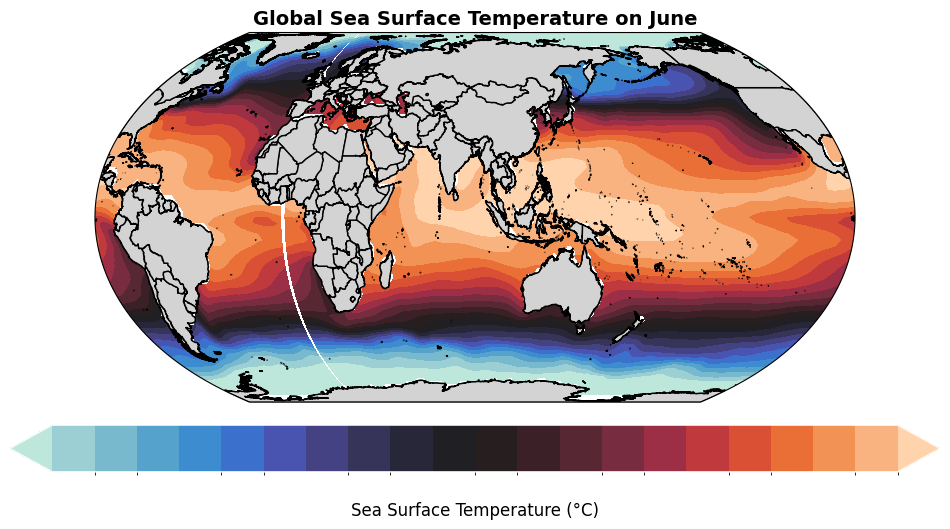

In [13]:


# add a color bar (legend)
cbar = plt.colorbar(contour, ax=ax, orientation='horizontal', pad=0.05)
cbar.set_label('Sea Surface Temperature (°C)', fontsize=12)
cbar.ax.xaxis.set_tick_params(color='white')
cbar.outline.set_edgecolor('white')
plt.setp(plt.getp(cbar.ax.axes, 'xticklabels'), color='white')

# Add a title
plt.title('Global Sea Surface Temperature on June', fontsize=14, weight='bold', color='black')

# Add annotation for author and date in the bottom right
author_text = f'Author: Lalit BC \nData: FIRMS (NASA) \nDate: {datetime.date.today().strftime("%Y-%m-%d")}'
plt.annotate(author_text, xy=(1, 0), xycoords='axes fraction', fontsize=7, ha='right', va='bottom')

# Save the figure with high resolution and transparency
plt.savefig('SST_plot_asia.png', dpi=300, bbox_inches='tight', transparent=True)

# Display the plot
plt.show()
